# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [2]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
type(diabetes)

sklearn.utils.Bunch

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [6]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [ ]:
# Tenemos 10 columnas
# features y target
# 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [8]:
diabetes['data'].shape
diabetes['target'].shape

(442,)

## Buliding a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [9]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [10]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [11]:
diabetes_data_train = diabetes['data'][:-20]
diabetes_target_train = diabetes['target'][:-20]
diabetes_data_test = diabetes['data'][-20:]
diabetes_target_test = diabetes['target'][-20:]

In [13]:
print(diabetes_data_train.shape)
print(diabetes_data_test.shape)

(422, 10)
(20, 10)


Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [14]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

In [15]:
diabetes_model.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [16]:
diabetes_model.intercept_

152.76430691633442

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [17]:
diabetes_model.predict(diabetes_data_test)

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

#### Print your `diabetes_target_test` and compare with the prediction. 

In [18]:
diabetes_target_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

#### Is `diabetes_target_test` exactly the same as the model prediction?

In [19]:
diabetes_target_test - diabetes_model.predict(diabetes_data_test)

array([ 35.38153092, -64.43979328, -61.88665147,  40.46462721,
       -44.80054784, -64.06954875,  50.87762239,  -6.47935157,
        65.9398948 , -58.30503555, -45.36632793,  10.80168716,
       -83.25046751, -56.3332925 ,  -4.54458691, -16.03798088,
         1.42860298,   8.43395013,   8.9653683 ,   4.39664326])

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

predicted = diabetes_model.predict(diabetes_data_test)

print('MSE:', mean_squared_error(diabetes_target_test, predicted))
print('RMSE:', np.sqrt(mean_squared_error(diabetes_target_test, predicted)))
print('MAE:', mean_absolute_error(diabetes_target_test, predicted))

MSE: 2004.5676026898211
RMSE: 44.77239777686495
MAE: 36.610175567158834


#### Which are the most important features?

In [24]:
import pandas as pd
coeff_df = pd.DataFrame(diabetes_model.coef_,
                       diabetes['feature_names'],
                       columns = ['Coefficent'])

coeff_df.sort_values('Coefficent', ascending=False)

,Coefficent
s5,743.519617
bmi,510.530605
s2,492.814588
bp,327.736980
s4,184.606489
s3,102.848452
s6,76.095172
age,0.303500
sex,-237.639315
s1,-814.131709


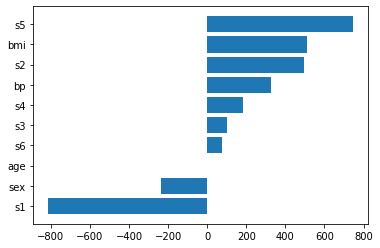

In [26]:
import matplotlib.pyplot as plt
coeff_df = coeff_df.sort_values('Coefficent', ascending=True)
plt.barh(coeff_df.index, coeff_df.Coefficent);